# dt updaters

In [2]:
from manim import *
config.media_embed = True; config.media_width = "100%"
_RV = "-v WARNING -qm --progress_bar None --disable_caching Example"
_RI = "-v WARNING -s --progress_bar None --disable_caching Example"

Manim Community v0.15.1

## Sub 1

In [3]:
class Example(Scene):
    def construct(self):
        self.play(GrowFromCenter(Star()))

%manim $_RV

## Sub 2

In [3]:
class Example(Scene):
    def construct(self):
        self.play(Write(Square()))

%manim $_RV

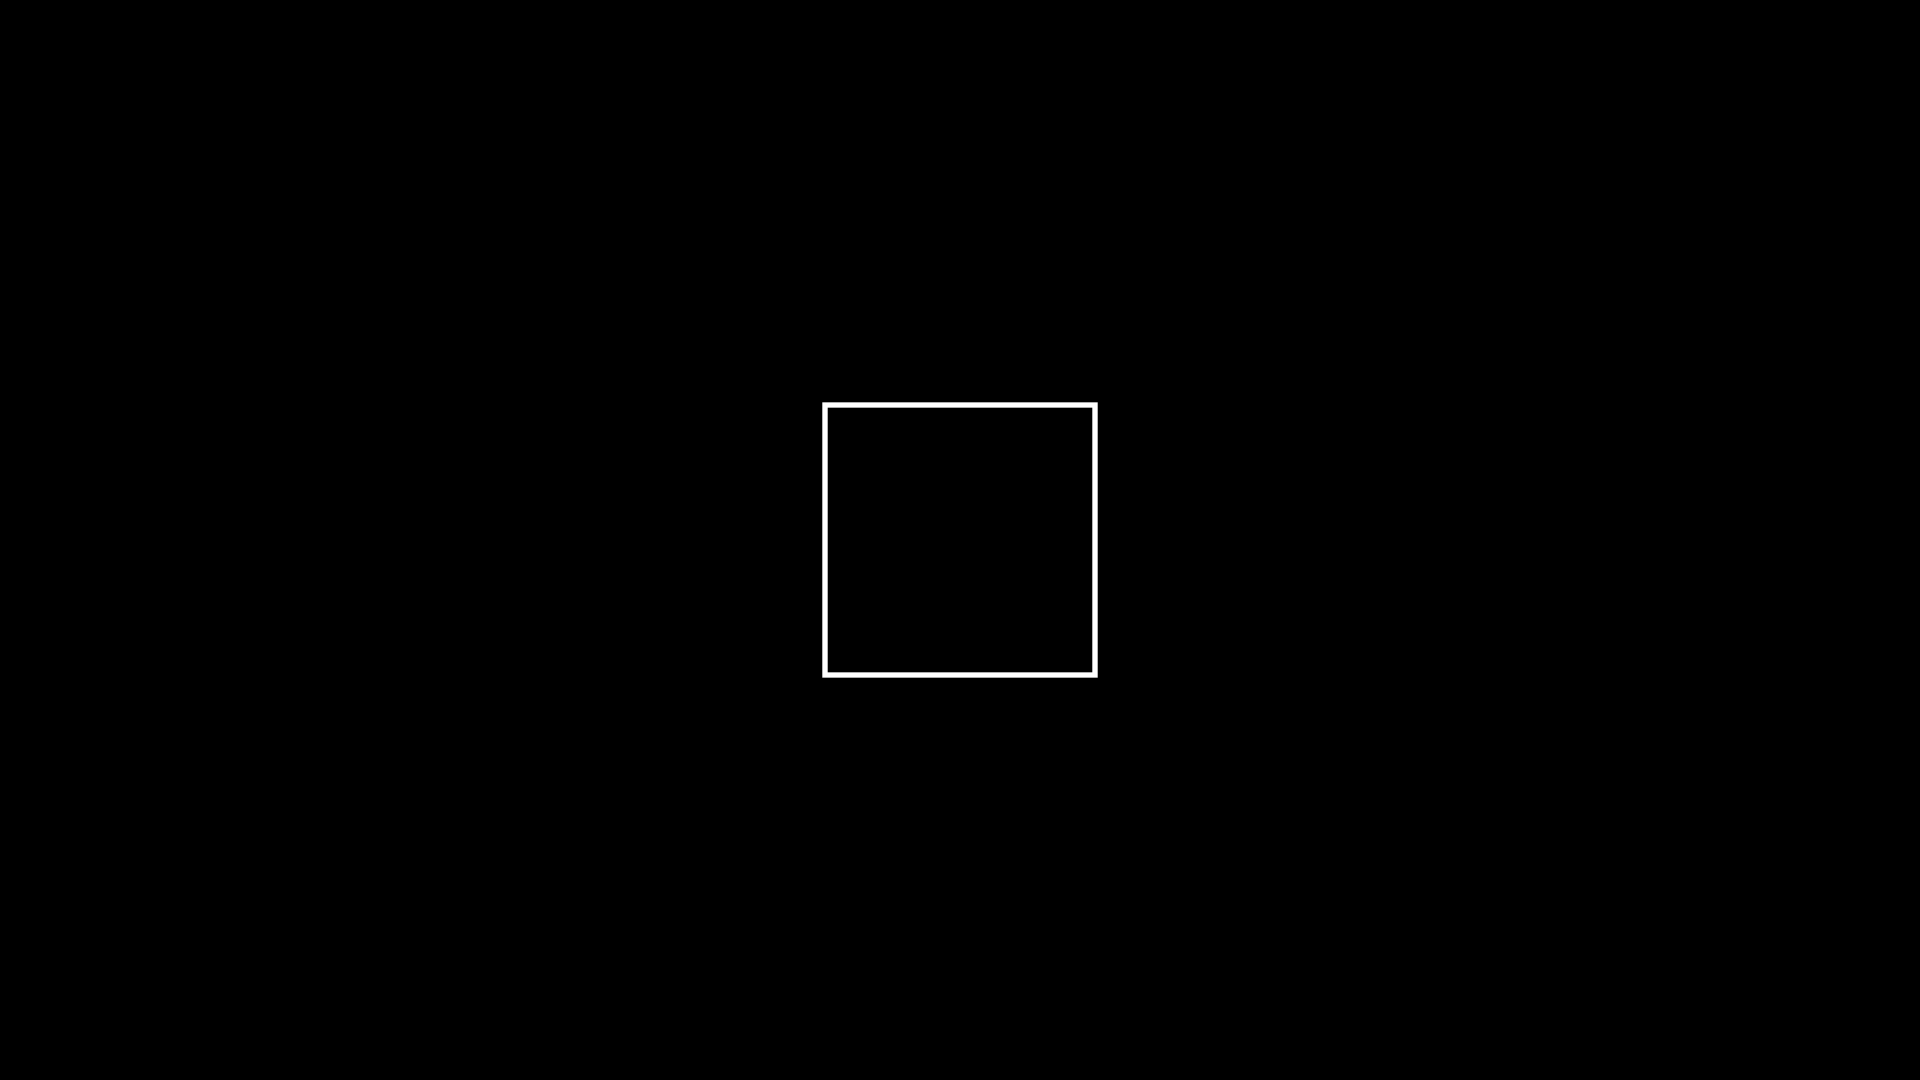

In [4]:
class Example(Scene):
    def construct(self):
        self.play(FadeIn(Square()))

%manim $_RI
